In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1

#### A)
i)

ii)

iii)

iv）

#### B)
\begin{align*}
    f(\theta|x) &= \frac{f(x|\theta)f(\theta)}{\int_{\theta} f(x|\theta')f(\theta')d\theta'} \\
        &= \frac{\theta^{\sum_{i=1}^n x_i}(1-\theta)^{n-\sum_{i=1}^n x_i}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\theta^{a-1}(1-\theta)^{b-1}}{\int_{\theta}{\theta'}^{\sum_{i=1}^n x_i}(1-\theta')^{n-\sum_{i=1}^n x_i}\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}{\theta'}^{a-1}(1-\theta')^{b-1} d\theta'} \\
        &= \frac{\theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i}}{\int_{\theta}{\theta'}^{a-1+\sum_{i=1}^nx_i}(1-\theta')^{b-1+n-\sum_{i=1}^nx_i}d\theta'} \\
        &= \frac{\theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i}}{\frac{\Gamma(a+\sum_{i=1}^nx_i)\Gamma(b+n-\sum_{i=1}^nx_i)}{\Gamma(a+b+n)}} \tag{using integration of Gamma distribution} \\
        &= \frac{\Gamma(a+b+n)}{\Gamma(a+\sum_{i=1}^nx_i)\Gamma(b+n-\sum_{i=1}^nx_i)} \theta^{a-1+\sum_{i=1}^nx_i}(1-\theta)^{b-1+n-\sum_{i=1}^nx_i} \\
        &= Beta\left(a+\sum_{i=1}^nx_i,b+n-\sum_{i=1}^nx_i\right)
\end{align*}

#### C)
$$\mathbb{E}[f(\theta|x)] = \frac{a+\sum_{i=1}^nx_i}{a+b+n}$$

#### D)
$f(\theta) = 1$ when $a=1, b=1$.

This is uniform distribution and this implies that everyone is equally likely to contract the virus.

#### E)

In [2]:
def plot_dists(a, b, n, sx):
    prior = np.random.beta(a, b, size=n)
    postr = np.random.beta(a+sx, b+n-sx, size=n)

    fig, axs = plt.subplots(1, 2, figsize=(12,6))
    axs[0].set_title(f'Prior Distribution a={a}, b={b}, N={n}')
    axs[0].hist(prior)
    axs[0].set_xlabel('Sampled Values')
    axs[0].set_ylabel('Counts')
    axs[1].set_title(f'Posterior Distribution a={a}, b={b}, N={n}, sum = {sx}')
    axs[1].hist(postr)
    axs[1].set_xlabel('Sampled Values')
    axs[1].set_ylabel('Counts')

    plt.tight_layout()
    plt.show()
    
    return prior, postr


def beta_mean(a, b):
    return a / (a+b)

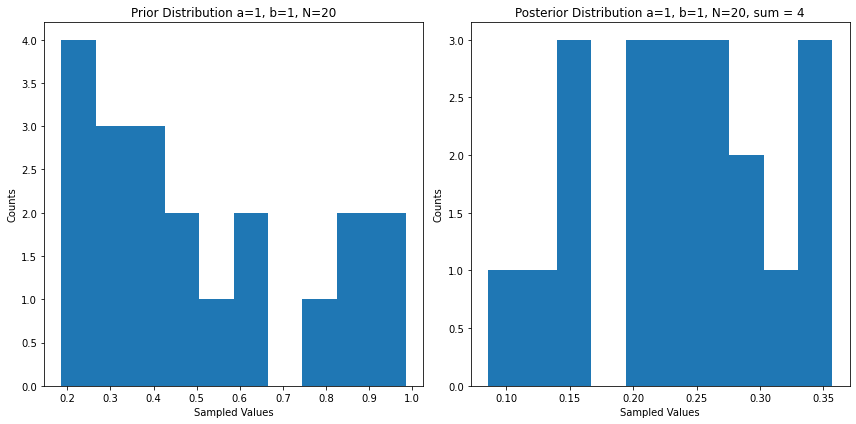

Posterior Mean: 0.227
Prior Mean: 0.500
Sample Mean: 0.237


In [3]:
a = 1
b = 1
sx = 4
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### F)

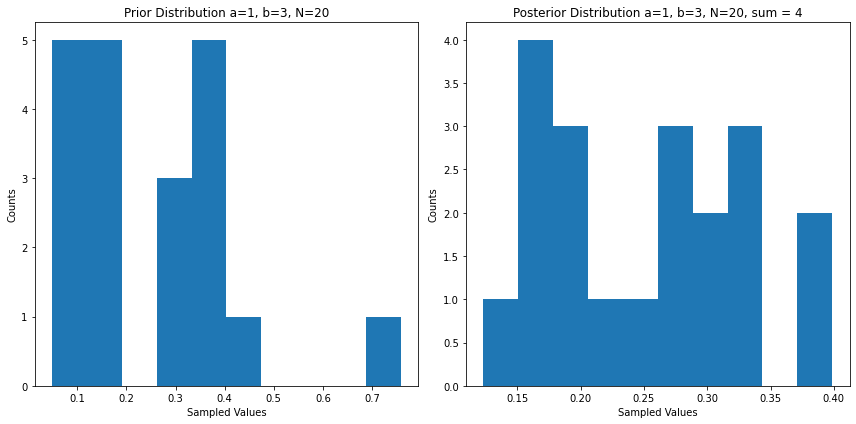

Posterior Mean: 0.208
Prior Mean: 0.250
Sample Mean: 0.253


In [4]:
a = 1
b = 3
sx = 4
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### G)

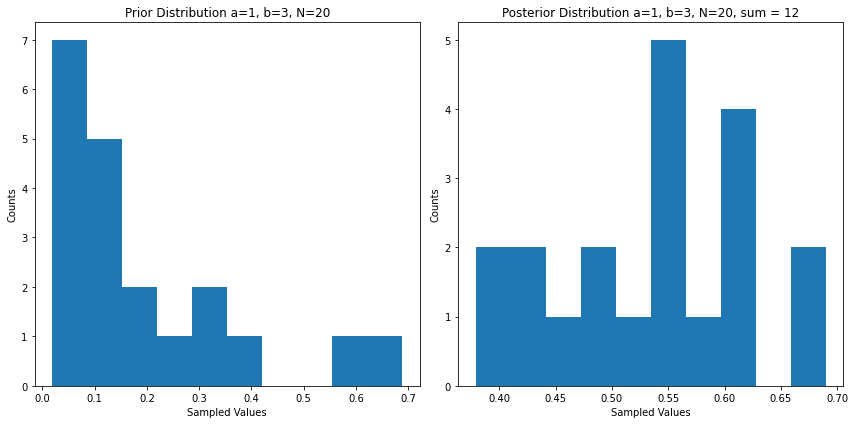

Posterior Mean: 0.542
Prior Mean: 0.250
Sample Mean: 0.532


In [5]:
a = 1
b = 3
sx = 12
n = 20
prior, posterior = plot_dists(a, b, n, sx)
print(f'Posterior Mean: {beta_mean(a+sx, b+n-sx):.3f}')
print(f'Prior Mean: {beta_mean(a, b):.3f}')
print(f'Sample Mean: {np.mean(posterior):.3f}')

#### H)
The family of distribution that the prior and posterior follow is the exponential family which follows the following form
$$f_{\theta}(x) = h(x)c(\theta)\exp\left(\sum_{i=1}^k w_i(\theta)t_i(x)\right)$$
where $\theta$ is all of the parameters, $h(x) \geq 0$, $t_i(x)$ independent of $\theta$, and $c(\theta) > 0$.

Another prior that is in exponential family is the Weibull Distribution $X \sim Weibull(\lambda, k), \lambda, k > 0$.
$$f(x) = \frac{k}{\lambda}\left(\frac{x}{\lambda}\right)^{k-1}e^{-(x/\lambda)^k}, \text{when } x\geq 0; f(x)=0 \text{otherwise}$$

The associated likelihood is $\lambda\Gamma(1 + 1/k)$

### Question 2)

#### A)

\begin{align*}
    \mathbb{E}[X] &= \int_{0}^{\infty} x\lambda e^{-\lambda x} dx \\
        &= \lambda\times\left[-\frac{1}{\lambda}xe^{-\lambda x} \biggr\rvert_{x=0}^{\infty} + \frac{1}{\lambda}\int_{0}^{\infty}e^{-\lambda x}dx\right] \tag{integration by parts} \\
        &= \frac{-1}{\lambda}e^{-\lambda x} \biggr\rvert_{x=0}^{\infty} \tag{first part's limit goes to 0}\\
        &= \frac{1}{\lambda}
\end{align*}

#### B) + C)

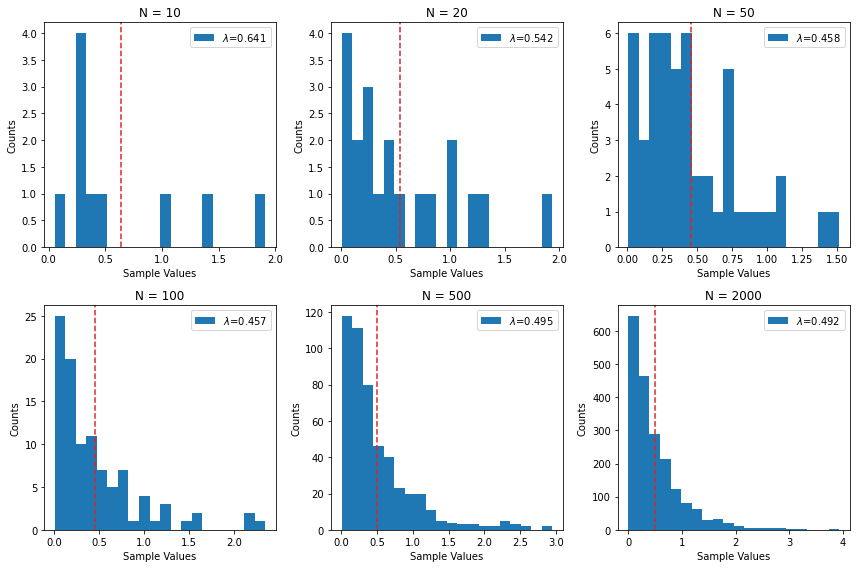

In [6]:
lbda = 2
sample_sizes = [10, 20, 50, 100, 500, 2000]

fig, axs = plt.subplots(2,3,figsize=(12,8))
for i, n in enumerate(sample_sizes):
    xi = int(i/3)
    yi = int(i%3)
    
    x = np.random.exponential(scale=1/lbda, size=n)
    axs[xi,yi].hist(x, bins=20, label=f'$\lambda$={np.mean(x):.3f}')
    axs[xi,yi].axvline(x=np.mean(x), color='tab:red', linestyle='--')
    axs[xi,yi].set_xlabel('Sample Values')
    axs[xi,yi].set_ylabel('Counts')
    axs[xi,yi].set_title(f'N = {n}')
    axs[xi,yi].legend()
plt.tight_layout()
plt.show()

#### D)
The law for explaining this behavior is the Law of Large Numbers which states that as the sample sizes grow, the sample mean gets closer and closer to the true average of the whole population (which is the exponential distribution with mean of 0.5).

### Question 3

#### A)
The theoretical sample mean should be $\bar{X} \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$

#### B)

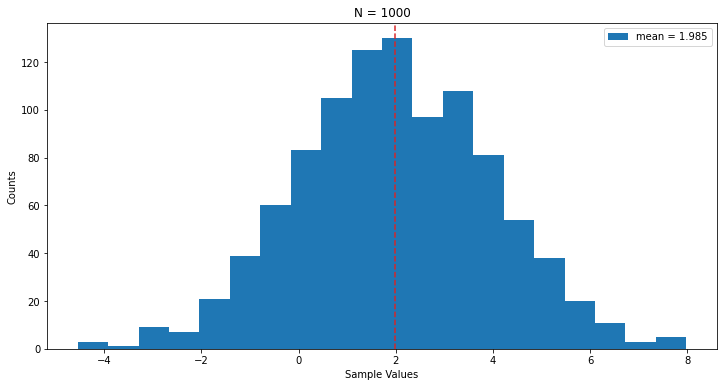

In [7]:
mu = 2
sig2 = 4
n = 1000

x = np.random.normal(loc=mu, scale=np.sqrt(sig2), size=n)

fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(x, bins=20, label=f'mean = {np.mean(x):.3f}')
ax.axvline(x=np.mean(x), color='tab:red', linestyle='--')
ax.set_xlabel('Sample Values')
ax.set_ylabel('Counts')
ax.set_title(f'N = {n}')
ax.legend()
plt.show()

#### C)

In [8]:
def bootstrap(X, B, M):
    means = np.zeros(B)
    for i in range(B):
        means[i] = np.mean(np.random.choice(X, size=M))
    return means

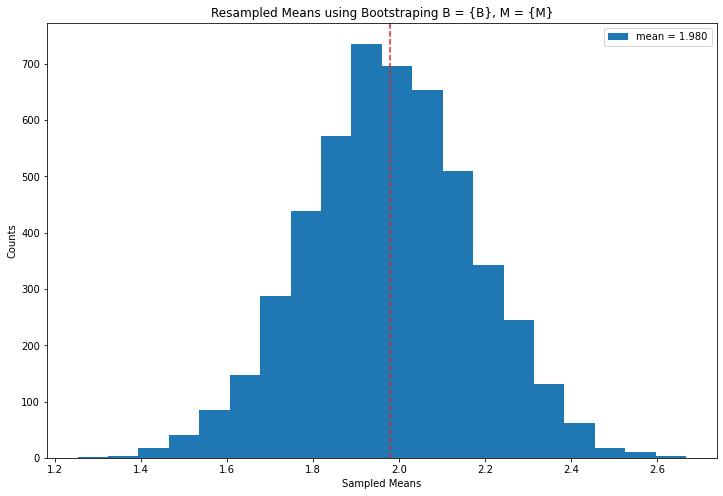

In [9]:
B = 5000
M = 100
means = bootstrap(x, B, M)

fig, ax = plt.subplots(figsize=(12,8))
ax.hist(means, bins=20, label=f'mean = {np.mean(means):.3f}')
ax.axvline(x=np.mean(means), color='tab:red', linestyle='--')
ax.set_xlabel('Sampled Means')
ax.set_ylabel('Counts')
ax.set_title('Resampled Means using Bootstraping B = {B}, M = {M}')
ax.legend()

plt.show()

#### D)
The true distribution of $\bar{X}$ should have mean of 2 and variance of $\frac{\sigma^2}{n} = 0.04$ since we are sampling only 100 numbers each time (hence $n=100$). The distribution of simulated sampled means is very close to the true distribution. 

In [10]:
mu_s = np.mean(means)
std_s = np.std(means)
var_s = std_s ** 2
print(f'The distribution has mean {mu_s:.3f} and variance {var_s:.3f}')

The distribution has mean 1.980 and variance 0.038


#### E)
To construct the 95% confidence interval, we do the following
1. Obtain the mean of the statistic
2. Compute the critical value
    - Find the critical probability for 95% confidence
    - Use t-statistics to find critical value with degree of freedom being sample size minus one
3. Compute the margin of error (critical value * standard error of statistic)
4. Interval is mean plus/minus the margin of error

#### F)

In [11]:
# mean of statistic: mu_s
# standard deviation of statistic: std_s

def get_crit_val(confint, df):
    from scipy import stats
    
    alpha = 1 - confint
    crit_p = 1 - alpha / 2
    return stats.t.ppf(crit_p, df)

crit_v = get_crit_val(0.95, n-1)
lb = mu_s - crit_v * var_s
ub = mu_s + crit_v * var_s

In [12]:
print(f'The 95% Confidence Interval is: [{lb:.3f}, {ub:.3f}]')

The 95% Confidence Interval is: [1.904, 2.055]
